<a href="https://colab.research.google.com/github/anil-kk/deeplearning/blob/master/PyTorch_NN_Train_and_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

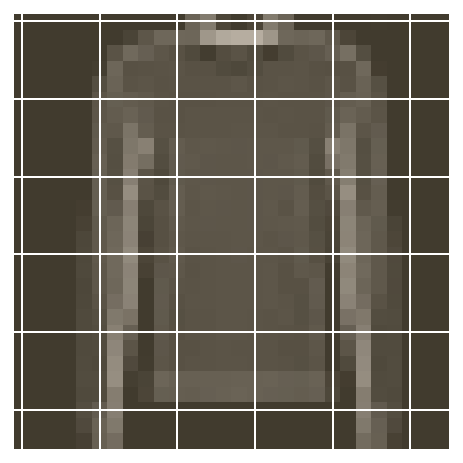

In [25]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import helper



# transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])
# download and load training data
trainset = datasets.FashionMNIST('~/.pytorch/Fashion_MNIST_data/', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/Fashion_MNIST_data/', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

image, label = next(iter(train_loader))
helper.imshow(image[0,:]);
      

  

In [0]:
class Classify(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256) # 256 nodes
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)
    
    self.dropout = nn.Dropout(p=0.2) # helps to fix overfitting, high variance

  def forward(self, x):
    
    x = x.view(x.shape[0], -1) # flatten input tensor, batch size is first parameter to view method
    
    x = self.dropout(F.relu(self.fc1(x))) # ReLU activation function
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    
    x = F.log_softmax(self.fc4(x), dim=1) # across columns
    
    return x
  
#Neural Network
model = Classify()

#define criterion and optimizer
criterion = nn.NLLLoss() # Negative Log Likelihood Loss
optimizer = optim.Adam(model.parameters(), lr=0.002) #momentum, speeds up fitting process, adjusts learning rate to individual parameters

In [21]:
#TRAIN
epochs = 20
train_losses = []
test_losses = []

for e in range(epochs):
  #Train
  train_loss_accum = 0
  for images, labels in train_loader:
    
    optimizer.zero_grad()
    
    log_probabilities = model(images) # forward
    loss = criterion(log_probabilities, labels)
    
    loss.backward()#backward
    optimizer.step()
    
    train_loss_accum += loss.item()
  else:
    #Validation
      with torch.no_grad():
        model.eval() # in evaluation mode dropout are disabled
        test_loss_accum = 0
        accuracy = 0
        for images, labels in test_loader:
          log_probabilities = model(images)
          test_loss_accum += criterion(log_probabilities, labels)
          
          probabilities = torch.exp(log_probabilities)
          top_p, top_class = probabilities.topk(1,dim=1)
          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))
          
      train_losses.append(train_loss_accum/len(train_loader))
      test_losses.append(test_loss_accum/len(test_loader))          
      print("-------------------------------------------------------")
      print(f"epoch: {e+1}/ {epochs}")
      print(f"training loss: {train_loss_accum/len(train_loader)}")
      print(f"test loss: {test_loss_accum/len(test_loader)}") 
      print(f"accuracy: {accuracy/len(test_loader)}")
  
    model.train()
      

-------------------------------------------------------
epoch: 1/ 20
training loss: 0.5978761552842949
test loss: 0.4560098946094513
accuracy: 0.8297173380851746
-------------------------------------------------------
epoch: 2/ 20
training loss: 0.4586403991367771
test loss: 0.41488972306251526
accuracy: 0.8516122698783875
-------------------------------------------------------
epoch: 3/ 20
training loss: 0.4241137503703901
test loss: 0.40022531151771545
accuracy: 0.8545979261398315
-------------------------------------------------------
epoch: 4/ 20
training loss: 0.40405237449130527
test loss: 0.39131978154182434
accuracy: 0.8600716590881348
-------------------------------------------------------
epoch: 5/ 20
training loss: 0.3848457346434024
test loss: 0.3908432126045227
accuracy: 0.8607683181762695
-------------------------------------------------------
epoch: 6/ 20
training loss: 0.3751173725387435
test loss: 0.38678812980651855
accuracy: 0.8607683181762695
-----------------------

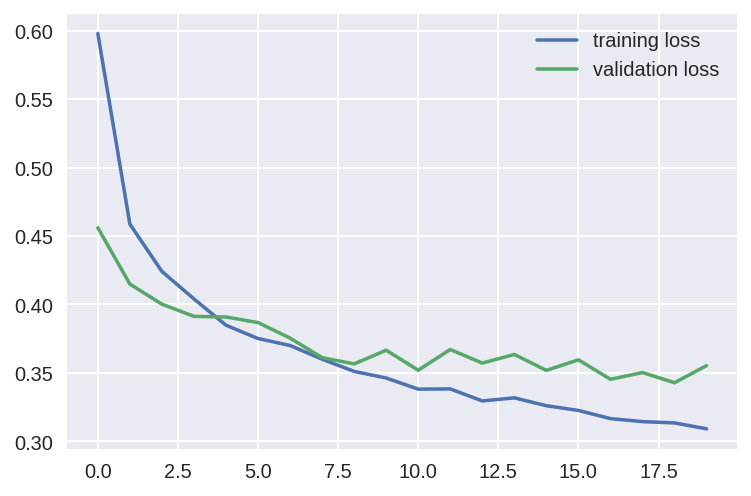

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.legend(frameon=False)


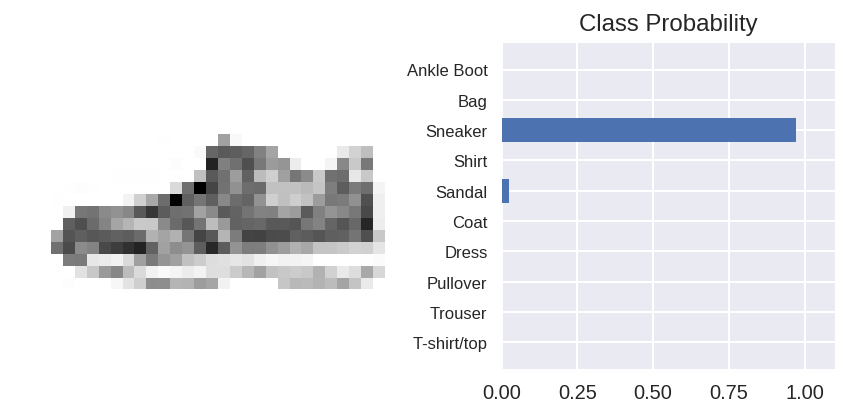

In [23]:
   #TEST   
      
%matplotlib inline
%config InlineBackend.figure_format ='retina'

import helper

data_iter = iter(test_loader)

images, labels = data_iter.next()

img = images[1]

probability = torch.exp(model(img))

helper.view_classify(img, probability, version='Fashion')

In [24]:
#Accuracy
images, labels = data_iter.next()
probabilities = torch.exp(model(images))

top_p, top_class = probabilities.topk(1, dim=1)

equals = top_class == labels.view(*top_class.shape) # binary values

accuracy = torch.mean(equals.type(torch.FloatTensor))

print(f'accuracy: {accuracy.item()*100}%')

accuracy: 84.375%
